In [2]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

data = pd.read_json('data/train.json', '')
print('There is ', len(data['id']), ' samples.')
cuisine_map = list(set(data['cuisine']))
ingredient_list = data['ingredients']
print(len(cuisine_map))
ingredient_map = []
for ingredients in ingredient_list:
    ingredient_map += ingredients
    ingredient_map = list(set(ingredient_map))

There is  39774  samples.
20


In [3]:
print(len(ingredient_map))
for ingredient in ingredient_map:
    print(ingredient)

6714
steak fillets
whole grain buns
bonito flakes
knorr tomato bouillon with chicken flavor
wasabi paste
Old El Paso Green Chiles
low-fat pasta sauce
sandwich rolls
SargentoВ® Traditional Cut Shredded Mozzarella Cheese
dried leaves oregano
kahlГєa
lemon twists
cold-smoked salmon
roasted almonds
active dry yeast
prosciutto fat
fresh turmeric
pot roast
carnitas
hamachi
gluten-free oyster sauce
italian sausage
boneless rib eye steaks
cherrystone clams
low-fat soft goat cheese
roast pork seasoning mix
quick-cooking oats
garland chrysanthemum
veal medallions
oil-cured black olives
capellini
won ton skins
beef
chГЁvre
cherries
brewed tea
whole grain rotini
anise seed
JohnsonvilleВ® Mild Italian Ground Sausage
porcini powder
palm vinegar
pizza shells
low fat tortilla chip
cream powder
garlic shoots
2% reduced-fat milk
white frostings
Taco Bell Taco Seasoning Mix
McCormickВ® Pure Vanilla Extract
garlic cloves
stick butter
pecans
collard green leaves
McCormick Ground Ginger
whole wheat thin spa

aioli
cubed potatoes
cavatappi
pork sirloin
duck sauce
boneless turkey breast
nonfat sweetened condensed milk
nonfat cottage cheese
apricot brandy
heirloom squash
mexican style 4 cheese blend
shredded coleslaw mix
granny smith apples
spaghetti
plain breadcrumbs
medjool date
veal demi-glace
nonfat mayonnaise
smoked rashers
tap water
chili seasoning
light cream cheese
extra fine granulated sugar
Heath Candy Bars
Mizkan Rice Vinegar
bucatini
chili bean sauce
rotisserie chicken
queso manchego
potato starch
brown basmati rice
sliced cucumber
avocado
gooseberries
methi leaves
chocolate cake mix
chicken stock cubes
calamari steak
lasagne
pork leg
wine vinegar
blackcurrant syrup
sucanat
biscuit dough
lamb stock
nigella seeds
cotija
balsamic vinaigrette salad dressing
condensed reduced fat reduced sodium cream of chicken soup
pineapple juice
shredded Monterey Jack cheese
basil
seaweed
Yuzukosho
soft rolls
v 8 juice
baking powder
dried guajillo chiles
panela
frozen spring roll wrappers
herb chee

whole wheat penne pasta
coriander
parmigiano reggiano cheese
cocoa
meal
chicken gravy
penne rigate
turkey breast steaks
low-fat soy milk
quatre Г©pices
crumbles
fudge cake mix
red chili powder
raw cane sugar
cranberry juice
anise basil
passata
2% low fat cheddar chees
aonori
balm leaves
sweet corn kernels
rotini
doritos
dried chile
msg
gaeta olives
peppered bacon
fat-free shredded cheddar cheese
citrus slices
Daisy Sour Cream
light alfredo sauce
habanero
mature cheddar
assorted fresh vegetables
white vinegar
diced green chilies
Indian spice
amaretto
red lentils
hot italian pork sausage
steak seasoning
mein
fresh thyme leaves
water chestnuts
winesap
cooked ham
chocolate candy bars
fresh lemon
seasoned panko bread crumbs
sour salt
light molasses
black fungus
powdered milk
vanilla powder
yellowtail
kewra water
chipotle sauce
medium whole wheat tortillas
french fries
reduced fat cream of mushroom soup
gouda
Bartlett Pear
peeled shrimp
eggs
soybean oil
pastry flour
knorr leek recip mix
rico

A Taste of Thai Rice Noodles
salmon steaks
lop chong
boiling potatoes
flavored vodka
cointreau liqueur
apple jelly
chinese wolfberries
boneless ham
hops
low sodium store bought chicken stock
snaps
refrigerated seamless crescent dough
Pure Wesson Vegetable Oil
blood
golden caster sugar
olive oil cooking spray
gelatin
salad dressing
fideos pasta
minced onion
thick curds
center cut pork loin chops
fino sherry
sandwich steak
beef for stew
anise
dill
sorrel
tamales
extra firm silken tofu
rosewater
green pesto
arrowroot flour
stock
unsalted butter
instant tea powder
chicken bouillon
ground roasted sichuan peppers
flavored oil
mild curry paste
khoa
dri basil leaves, crush
cheese soup
creme anglaise
seltzer
filet mignon steaks
wasabi
Sriracha
sourdough loaf
hubbard squash
poi
sweetened red beans
tandoori seasoning
part-skim ricotta cheese
table syrup
Swanson Chicken Broth
curly parsley
low salt chicken broth
lemon verbena
Kewpie Mayonnaise
full fat cream cheese
crabmeat frozen
twists
chocolate

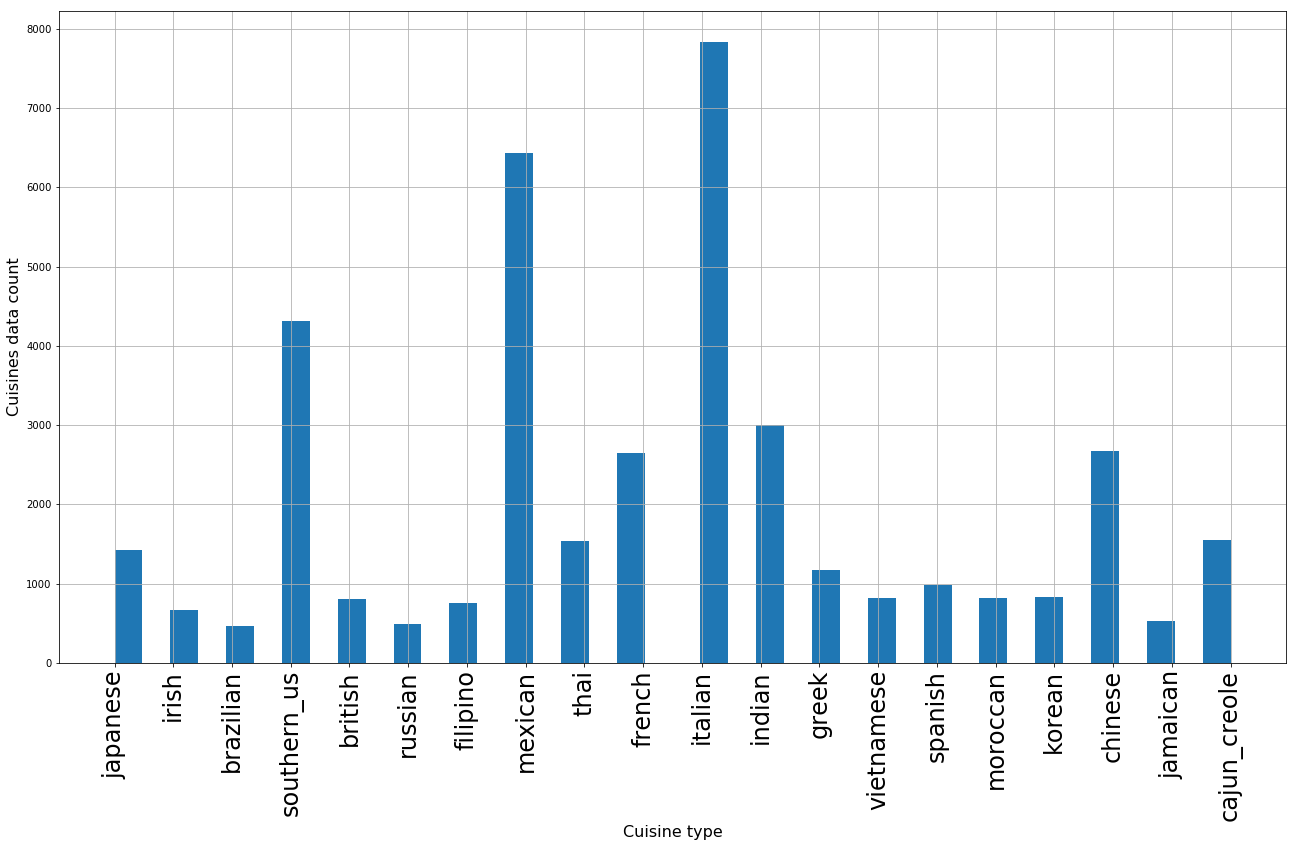

In [4]:
plt.figure(figsize=(22, 12))

plt.xlabel("Cuisine type", fontsize=16)  
plt.ylabel("Cuisines data count", fontsize=16)
cuisine_list = data['cuisine'].map(lambda x: cuisine_map.index(x))
cuisine_list.hist(bins=40)

x = np.array(range(20))
my_xticks = cuisine_map
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.xticks(fontsize=24)
plt.show()

In [5]:
from collections import defaultdict
ingredient_cuisine = defaultdict(set)
for item in range(len(data['id'])):
    for ingredient in data['ingredients'][item]:
        ingredient_cuisine[ingredient].add(data['cuisine'][item])

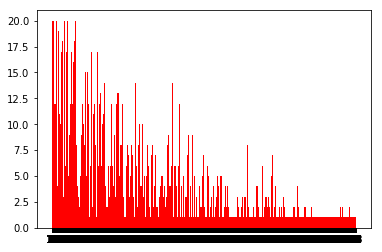

In [6]:
ingredient_frequency = np.array([len(cuisines) for (ingredient, cuisines) in ingredient_cuisine.items()])
alphab = np.array([len(ingredient) for (ingredient, cuisines) in ingredient_cuisine.items()])
frequencies = ingredient_frequency
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, frequencies, width, color='r')
plt.show()

In [7]:
pd.Series(ingredient_frequency).describe()

count    6714.000000
mean        4.345993
std         4.730157
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        20.000000
dtype: float64

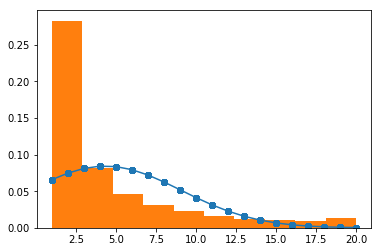

In [8]:
import scipy.stats as stats
import pylab as pl

h = sorted(ingredient_frequency)

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      

pl.show()

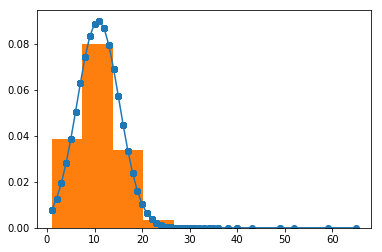

In [9]:
ingredient_size_frq = [len(ingredients) for ingredients in data['ingredients']]
h = sorted(ingredient_size_frq)

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      

pl.show()

In [10]:
train = pd.read_json('data/train.json')

In [11]:
words = [' '.join(item) for item in train.ingredients]

In [12]:
len(words)

39774

In [13]:
vec = CountVectorizer(max_features=2000)
bag_of_words = vec.fit(words).transform(words).toarray()

In [14]:
train_bag = bag_of_words
train_bag.shape

(39774, 2000)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['cuisine'])

LabelEncoder()

In [17]:
train['target'] = labelEncoder.transform(train['cuisine'])


In [18]:
print(labelEncoder.classes_)

['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french' 'greek'
 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean' 'mexican'
 'moroccan' 'russian' 'southern_us' 'spanish' 'thai' 'vietnamese']


In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from keras.utils.np_utils import to_categorical

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_bag, train['target'], test_size=0.33, stratify=train['target'])

In [23]:
y_nn_train = to_categorical(y_train)
y_nn_test = to_categorical(y_test)

In [24]:
y_nn_train.shape, y_nn_test.shape

((26648, 20), (13126, 20))

In [25]:
X_train.shape

(26648, 2000)

In [26]:
seed = 7
np.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(1700, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(1000, init='uniform', activation='relu'))
model.add(Dense(500, init='uniform', activation='relu'))
model.add(Dense(250, init='uniform', activation='relu'))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dense(y_nn_train[0].shape[0], activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1700, input_dim=2000, activation="relu", kernel_initializer="uniform")`
D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, activation="relu", kernel_initializer="uniform")`
D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="uniform")`
D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(250, activation="relu", kernel_initializer="uniform")`
D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_initializer="uniform")`


In [27]:
# Fit the model
model.fit(X_train, y_nn_train, epochs=10, batch_size=3000, verbose=1)

Epoch 1/10
26648/26648 [==============================] - 12s 463us/step - loss: 2.7467 - acc: 0.1665
Epoch 2/10
26648/26648 [==============================] - 10s 374us/step - loss: 2.1619 - acc: 0.3585
Epoch 3/10
26648/26648 [==============================] - 12s 436us/step - loss: 1.7226 - acc: 0.5115
Epoch 4/10
26648/26648 [==============================] - 13s 484us/step - loss: 1.4261 - acc: 0.5791
Epoch 5/10
26648/26648 [==============================] - 14s 508us/step - loss: 1.2171 - acc: 0.6379
Epoch 6/10
26648/26648 [==============================] - 15s 569us/step - loss: 1.0252 - acc: 0.6902
Epoch 7/10
26648/26648 [==============================] - 15s 548us/step - loss: 0.8604 - acc: 0.7391
Epoch 8/10
26648/26648 [==============================] - 15s 553us/step - loss: 0.7115 - acc: 0.7855
Epoch 9/10
26648/26648 [==============================] - 15s 575us/step - loss: 0.5804 - acc: 0.8264
Epoch 10/10
26648/26648 [==============================] - 16s 587us/step - loss: 

In [28]:
accuracy_score(model.predict_classes(X_train), y_train)

0.89759081356949866

In [29]:
accuracy_score(model.predict_classes(X_test), y_test)

0.74234344049977141

In [30]:
print(classification_report(model.predict_classes(X_train), y_train))

             precision    recall  f1-score   support

          0       0.34      0.74      0.46       141
          1       0.80      0.70      0.74       617
          2       0.87      0.93      0.90       969
          3       0.92      0.87      0.89      1885
          4       0.69      0.76      0.73       459
          5       0.92      0.81      0.86      2013
          6       0.85      0.91      0.88       735
          7       0.95      0.97      0.96      1970
          8       0.49      0.90      0.63       241
          9       0.97      0.96      0.96      5301
         10       0.84      0.65      0.73       456
         11       0.87      0.86      0.87       962
         12       0.80      0.84      0.82       529
         13       0.98      0.98      0.98      4289
         14       0.94      0.87      0.91       594
         15       0.55      0.76      0.64       237
         16       0.95      0.92      0.94      2998
         17       0.75      0.74      0.74   

In [31]:
print(classification_report(model.predict_classes(X_test), y_test))

             precision    recall  f1-score   support

          0       0.15      0.38      0.21        61
          1       0.42      0.38      0.40       289
          2       0.67      0.75      0.71       459
          3       0.80      0.78      0.79       901
          4       0.47      0.48      0.47       244
          5       0.68      0.51      0.58      1168
          6       0.68      0.71      0.69       375
          7       0.81      0.86      0.83       932
          8       0.27      0.63      0.38        93
          9       0.85      0.85      0.85      2589
         10       0.64      0.58      0.61       190
         11       0.69      0.71      0.70       452
         12       0.73      0.72      0.72       279
         13       0.89      0.92      0.90      2055
         14       0.75      0.62      0.68       326
         15       0.20      0.37      0.26        90
         16       0.78      0.72      0.75      1540
         17       0.42      0.44      0.43   